In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import IPython.display as ipd
import seaborn as sns

import warnings
import os
warnings.filterwarnings('ignore')

from torch import nn, optim
from torchvision import transforms, models, datasets

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pwd

'/home/user/shaheen.perveen/SER_new/Code/Model_Code'

In [ ]:
data_dir = '/root/autodl-tmp/SER/speech-emotion-recognition-iemocap-master/SER_new/IEMOCAP_image_data'
model_save_path = '/root/autodl-tmp/SER/speech-emotion-recognition-iemocap-master/SER_new/saved_models'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'

In [4]:
batch_size = 64

In [5]:
train_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    
test_transforms = transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [6]:
trainset = datasets.ImageFolder(train_dir,transform=train_transforms)
testset = datasets.ImageFolder(test_dir,transform=test_transforms)

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [8]:
print(len(testloader.dataset))

894


In [9]:
print(len(trainloader.dataset))

3598


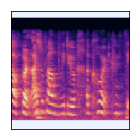

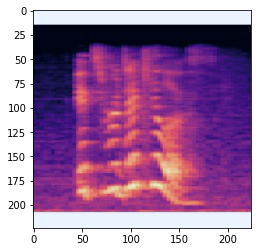

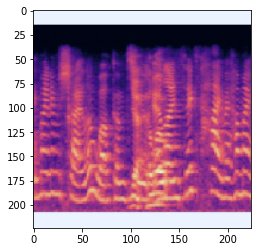

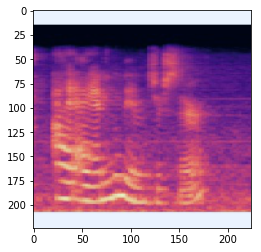

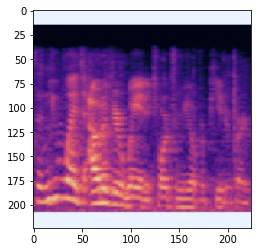

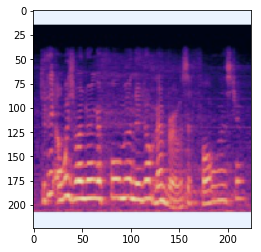

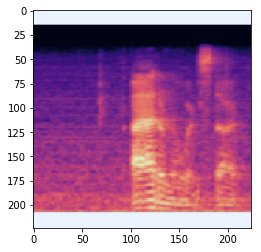

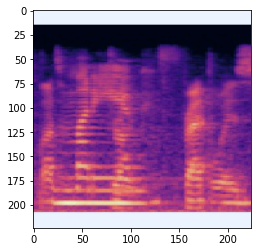

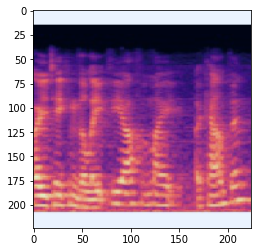

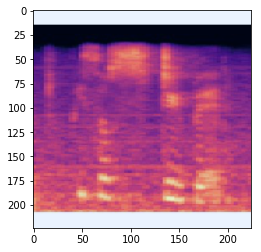

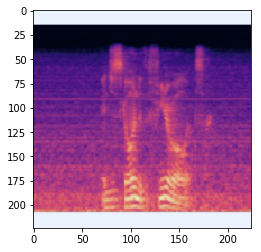

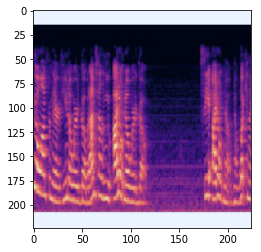

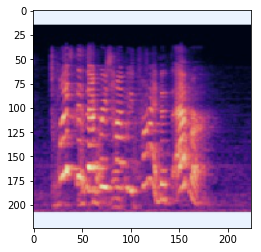

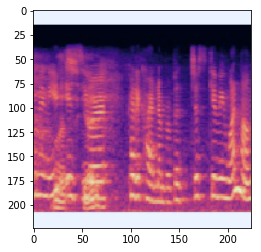

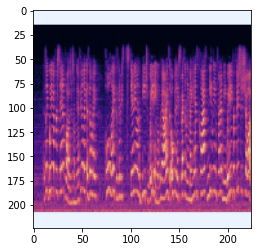

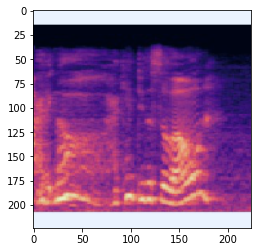

In [ ]:
# def scale(x, out_range=(-1, 1)):
#     domain = np.min(x), np.max(x)
#     y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
#     return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

def scale(x):
    return (x - np.min(x))/np.ptp(x)

def imshow(img):
    img = scale(img)
#     print(img)
    plt.imshow(np.transpose(img, (1,2,0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(20,5))

for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
plt.show()

In [10]:
trainiter = iter(trainloader)
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [11]:
torch.cuda.is_available()

True

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [14]:
# model = torch.load('/home/user/shaheen.perveen/SER_new/pretrained_model/resnet34-333f7ec4.pth')

In [13]:
model = models.resnet34(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [14]:
for param in model.parameters():
    param.requires_grad = False

In [15]:
classifier = nn.Sequential(nn.Linear(512, 200),
                           nn.ReLU(),
                          nn.Dropout(p=0.5),
                          nn.Linear(200, 4))
model.fc = classifier

In [16]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [17]:
# print(trainloader.dataset.classes)
print(trainloader.dataset.class_to_idx)

{'anger': 0, 'happiness': 1, 'neutral': 2, 'sadness': 3}


In [18]:
anger = 0
happiness = 0
neutral = 0
sadness = 0

for _, target in trainloader:
    labels = list(target.numpy())
    anger += len([x for x in labels if x == 0])
    happiness += len([x for x in labels if x == 1])
    neutral += len([x for x in labels if x == 2])
    sadness += len([x for x in labels if x == 3])
    
for _, target in testloader:
    labels = list(target.numpy())
    anger += len([x for x in labels if x == 0])
    happiness += len([x for x in labels if x == 1])
    neutral += len([x for x in labels if x == 2])
    sadness += len([x for x in labels if x == 3])

In [19]:
print("anger {} happiness {} neutral {} sadness {}".format(anger, happiness, neutral, sadness))

anger 1104 happiness 595 neutral 1709 sadness 1084


In [22]:
sample_weights = [1/anger, 1/happiness, 1/neutral, 1/sadness]
class_weights = torch.FloatTensor(sample_weights).cuda()
class_weights

tensor([0.0009, 0.0017, 0.0006, 0.0009], device='cuda:0')

In [23]:
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [24]:
# optimizer = optim.Adam(model.parameters(), lr=0.003)
# exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

model = model.to(device)

In [25]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

21,388,076 total parameters.
103,404 training parameters.


In [26]:
labels = list(trainloader.dataset.class_to_idx.keys())
labels

['anger', 'happiness', 'neutral', 'sadness']

In [ ]:
def plot_confusion_matrix(actual, predicted, labels):
    cm = confusion_matrix(actual, predicted, labels=labels)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 10}, fmt='.0f'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    plt.show()

In [28]:
label_to_class = {value: key for key, value in trainloader.dataset.class_to_idx.items()}
label_to_class

{0: 'anger', 1: 'happiness', 2: 'neutral', 3: 'sadness'}

In [29]:
def train(epoch, model):
    model.train()
    correct_train = 0
    train_loss = 0
    train_acc = 0
    
    
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        
        # zero the gradient, forward, backward and running pytorch rhythm
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        # get the label of prediction
        pred = torch.max(output.data, 1)[1]
        correct_train += pred.eq(target.data.view_as(pred)).cpu().sum()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\n'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    
    train_loss /= len(trainloader.dataset)
    train_acc = 100. * correct_train / len(trainloader.dataset)
    print('\nTrain set: Average loss: {:.4f}\n'.format(train_loss))
    print('\nTrain Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct_train, len(trainloader.dataset), 100. * correct_train / len(trainloader.dataset)))
    
    return train_loss, int(train_acc.numpy())
            

In [30]:
def test(model):
    model.eval()
    test_loss = 0
    test_acc = 0
    correct = 0
    history_test = []

    pred_model = []
    actual = []

    for data, target in testloader:
        data, target = data.to(device), target.to(device)

        # output from model
        output = model(data)

        # sum total loss
        test_loss += criterion(output, target).item()

        # get the label of prediction
        pred = torch.max(output.data, 1)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        pred_model.append(pred.cpu().numpy())
        actual.append(target.data.cpu().numpy())


    test_loss /= len(testloader.dataset)
    test_acc = 100. * correct / len(testloader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))


    pred_with_label = [label_to_class[label] for label in list(np.concatenate(pred_model))]
    actual_with_label = [label_to_class[label] for label in list(np.concatenate(actual))]

    plot_confusion_matrix(actual_with_label, pred_with_label, labels)

    print('\n Classification Report \n {} \n'.format(classification_report(actual_with_label, pred_with_label)))

    return test_loss, int(test_acc.numpy())

Train Epoch: 1 [0/3598 (0%)]	Loss: 1.485819

Train Epoch: 1 [640/3598 (18%)]	Loss: 1.370976

Train Epoch: 1 [1280/3598 (35%)]	Loss: 1.393843

Train Epoch: 1 [1920/3598 (53%)]	Loss: 1.406337

Train Epoch: 1 [2560/3598 (70%)]	Loss: 1.319962

Train Epoch: 1 [3200/3598 (88%)]	Loss: 1.367466


Train set: Average loss: 0.0217


Train Accuracy: 1096/3598 (30%)


Test set: Average loss: 0.0204, Accuracy: 377/894 (42%)



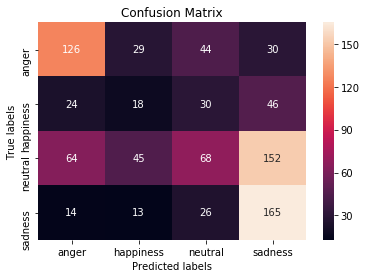


 Classification Report 
              precision    recall  f1-score   support

      anger       0.55      0.55      0.55       229
  happiness       0.17      0.15      0.16       118
    neutral       0.40      0.21      0.27       329
    sadness       0.42      0.76      0.54       218

avg / total       0.42      0.42      0.39       894
 

Train Epoch: 2 [0/3598 (0%)]	Loss: 1.367954

Train Epoch: 2 [640/3598 (18%)]	Loss: 1.357603

Train Epoch: 2 [1280/3598 (35%)]	Loss: 1.336306

Train Epoch: 2 [1920/3598 (53%)]	Loss: 1.364580

Train Epoch: 2 [2560/3598 (70%)]	Loss: 1.285977

Train Epoch: 2 [3200/3598 (88%)]	Loss: 1.326792


Train set: Average loss: 0.0207


Train Accuracy: 1420/3598 (39%)


Test set: Average loss: 0.0200, Accuracy: 362/894 (40%)



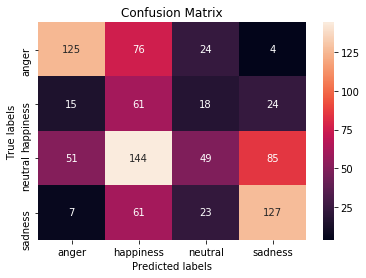


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.55      0.59       229
  happiness       0.18      0.52      0.27       118
    neutral       0.43      0.15      0.22       329
    sadness       0.53      0.58      0.55       218

avg / total       0.47      0.40      0.40       894
 

Train Epoch: 3 [0/3598 (0%)]	Loss: 1.249840

Train Epoch: 3 [640/3598 (18%)]	Loss: 1.302383

Train Epoch: 3 [1280/3598 (35%)]	Loss: 1.343881

Train Epoch: 3 [1920/3598 (53%)]	Loss: 1.249581

Train Epoch: 3 [2560/3598 (70%)]	Loss: 1.326182

Train Epoch: 3 [3200/3598 (88%)]	Loss: 1.222894


Train set: Average loss: 0.0200


Train Accuracy: 1479/3598 (41%)


Test set: Average loss: 0.0192, Accuracy: 416/894 (46%)



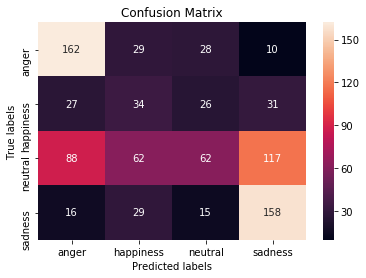


 Classification Report 
              precision    recall  f1-score   support

      anger       0.55      0.71      0.62       229
  happiness       0.22      0.29      0.25       118
    neutral       0.47      0.19      0.27       329
    sadness       0.50      0.72      0.59       218

avg / total       0.47      0.47      0.44       894
 

Train Epoch: 4 [0/3598 (0%)]	Loss: 1.147078

Train Epoch: 4 [640/3598 (18%)]	Loss: 1.272301

Train Epoch: 4 [1280/3598 (35%)]	Loss: 1.274328

Train Epoch: 4 [1920/3598 (53%)]	Loss: 1.220268

Train Epoch: 4 [2560/3598 (70%)]	Loss: 1.214042

Train Epoch: 4 [3200/3598 (88%)]	Loss: 1.211845


Train set: Average loss: 0.0196


Train Accuracy: 1584/3598 (44%)


Test set: Average loss: 0.0187, Accuracy: 433/894 (48%)



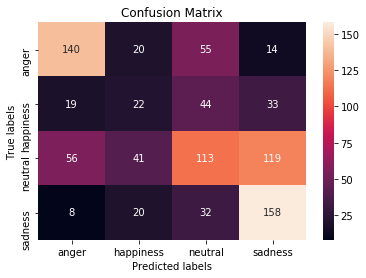


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.61      0.62       229
  happiness       0.21      0.19      0.20       118
    neutral       0.46      0.34      0.39       329
    sadness       0.49      0.72      0.58       218

avg / total       0.48      0.48      0.47       894
 

Train Epoch: 5 [0/3598 (0%)]	Loss: 1.218620

Train Epoch: 5 [640/3598 (18%)]	Loss: 1.140656

Train Epoch: 5 [1280/3598 (35%)]	Loss: 1.182285

Train Epoch: 5 [1920/3598 (53%)]	Loss: 1.213181

Train Epoch: 5 [2560/3598 (70%)]	Loss: 1.261225

Train Epoch: 5 [3200/3598 (88%)]	Loss: 1.226140


Train set: Average loss: 0.0192


Train Accuracy: 1698/3598 (47%)


Test set: Average loss: 0.0184, Accuracy: 423/894 (47%)



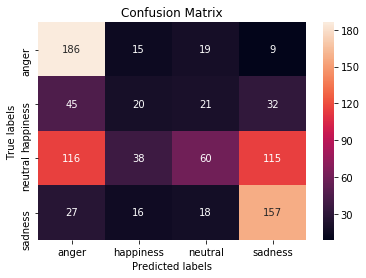


 Classification Report 
              precision    recall  f1-score   support

      anger       0.50      0.81      0.62       229
  happiness       0.22      0.17      0.19       118
    neutral       0.51      0.18      0.27       329
    sadness       0.50      0.72      0.59       218

avg / total       0.47      0.47      0.43       894
 

Train Epoch: 6 [0/3598 (0%)]	Loss: 1.098882

Train Epoch: 6 [640/3598 (18%)]	Loss: 1.300060

Train Epoch: 6 [1280/3598 (35%)]	Loss: 1.249062

Train Epoch: 6 [1920/3598 (53%)]	Loss: 1.213333

Train Epoch: 6 [2560/3598 (70%)]	Loss: 1.206773

Train Epoch: 6 [3200/3598 (88%)]	Loss: 1.051284


Train set: Average loss: 0.0190


Train Accuracy: 1653/3598 (45%)


Test set: Average loss: 0.0183, Accuracy: 429/894 (47%)



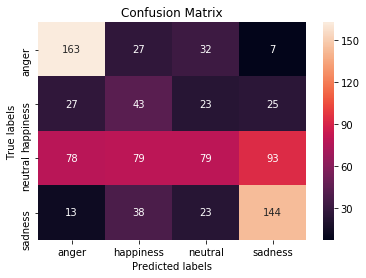


 Classification Report 
              precision    recall  f1-score   support

      anger       0.58      0.71      0.64       229
  happiness       0.23      0.36      0.28       118
    neutral       0.50      0.24      0.33       329
    sadness       0.54      0.66      0.59       218

avg / total       0.49      0.48      0.46       894
 

Train Epoch: 7 [0/3598 (0%)]	Loss: 1.245727

Train Epoch: 7 [640/3598 (18%)]	Loss: 1.106916

Train Epoch: 7 [1280/3598 (35%)]	Loss: 1.285640

Train Epoch: 7 [1920/3598 (53%)]	Loss: 1.143768

Train Epoch: 7 [2560/3598 (70%)]	Loss: 1.259127

Train Epoch: 7 [3200/3598 (88%)]	Loss: 1.095620


Train set: Average loss: 0.0187


Train Accuracy: 1695/3598 (47%)


Test set: Average loss: 0.0180, Accuracy: 446/894 (49%)



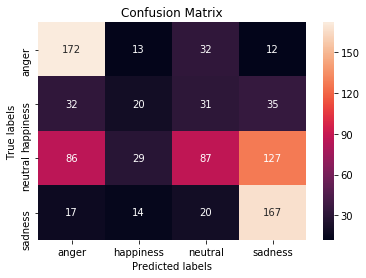


 Classification Report 
              precision    recall  f1-score   support

      anger       0.56      0.75      0.64       229
  happiness       0.26      0.17      0.21       118
    neutral       0.51      0.26      0.35       329
    sadness       0.49      0.77      0.60       218

avg / total       0.49      0.50      0.47       894
 

Train Epoch: 8 [0/3598 (0%)]	Loss: 1.196393

Train Epoch: 8 [640/3598 (18%)]	Loss: 1.249095

Train Epoch: 8 [1280/3598 (35%)]	Loss: 1.266059

Train Epoch: 8 [1920/3598 (53%)]	Loss: 1.189936

Train Epoch: 8 [2560/3598 (70%)]	Loss: 1.173808

Train Epoch: 8 [3200/3598 (88%)]	Loss: 1.153149


Train set: Average loss: 0.0183


Train Accuracy: 1763/3598 (48%)


Test set: Average loss: 0.0178, Accuracy: 437/894 (48%)



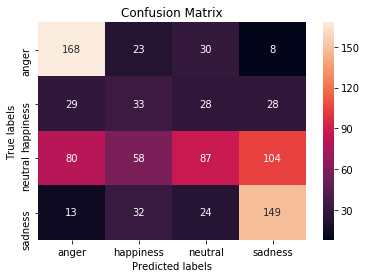


 Classification Report 
              precision    recall  f1-score   support

      anger       0.58      0.73      0.65       229
  happiness       0.23      0.28      0.25       118
    neutral       0.51      0.26      0.35       329
    sadness       0.52      0.68      0.59       218

avg / total       0.49      0.49      0.47       894
 

Train Epoch: 9 [0/3598 (0%)]	Loss: 1.033138

Train Epoch: 9 [640/3598 (18%)]	Loss: 1.174482

Train Epoch: 9 [1280/3598 (35%)]	Loss: 1.165336

Train Epoch: 9 [1920/3598 (53%)]	Loss: 1.264951

Train Epoch: 9 [2560/3598 (70%)]	Loss: 1.261553

Train Epoch: 9 [3200/3598 (88%)]	Loss: 1.159648


Train set: Average loss: 0.0183


Train Accuracy: 1737/3598 (48%)


Test set: Average loss: 0.0176, Accuracy: 459/894 (51%)



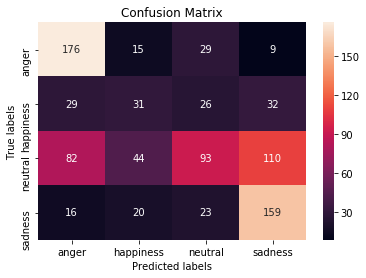


 Classification Report 
              precision    recall  f1-score   support

      anger       0.58      0.77      0.66       229
  happiness       0.28      0.26      0.27       118
    neutral       0.54      0.28      0.37       329
    sadness       0.51      0.73      0.60       218

avg / total       0.51      0.51      0.49       894
 

Train Epoch: 10 [0/3598 (0%)]	Loss: 1.192398

Train Epoch: 10 [640/3598 (18%)]	Loss: 1.256065

Train Epoch: 10 [1280/3598 (35%)]	Loss: 1.034637

Train Epoch: 10 [1920/3598 (53%)]	Loss: 1.140839

Train Epoch: 10 [2560/3598 (70%)]	Loss: 1.129484

Train Epoch: 10 [3200/3598 (88%)]	Loss: 1.103459


Train set: Average loss: 0.0180


Train Accuracy: 1773/3598 (49%)


Test set: Average loss: 0.0175, Accuracy: 453/894 (50%)



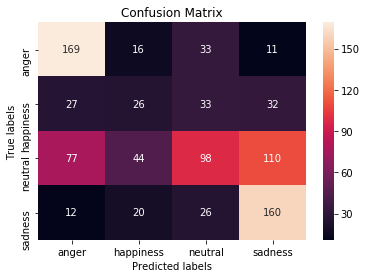


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.74      0.66       229
  happiness       0.25      0.22      0.23       118
    neutral       0.52      0.30      0.38       329
    sadness       0.51      0.73      0.60       218

avg / total       0.50      0.51      0.49       894
 

Train Epoch: 11 [0/3598 (0%)]	Loss: 1.020011

Train Epoch: 11 [640/3598 (18%)]	Loss: 1.120756

Train Epoch: 11 [1280/3598 (35%)]	Loss: 1.103562

Train Epoch: 11 [1920/3598 (53%)]	Loss: 1.135782

Train Epoch: 11 [2560/3598 (70%)]	Loss: 1.187691

Train Epoch: 11 [3200/3598 (88%)]	Loss: 1.188871


Train set: Average loss: 0.0179


Train Accuracy: 1796/3598 (49%)


Test set: Average loss: 0.0174, Accuracy: 452/894 (50%)



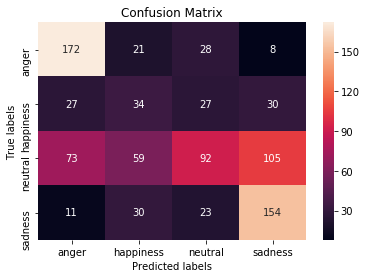


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.75      0.67       229
  happiness       0.24      0.29      0.26       118
    neutral       0.54      0.28      0.37       329
    sadness       0.52      0.71      0.60       218

avg / total       0.51      0.51      0.49       894
 

Train Epoch: 12 [0/3598 (0%)]	Loss: 1.105922

Train Epoch: 12 [640/3598 (18%)]	Loss: 1.060366

Train Epoch: 12 [1280/3598 (35%)]	Loss: 1.171232

Train Epoch: 12 [1920/3598 (53%)]	Loss: 1.080545

Train Epoch: 12 [2560/3598 (70%)]	Loss: 1.135849

Train Epoch: 12 [3200/3598 (88%)]	Loss: 1.213474


Train set: Average loss: 0.0178


Train Accuracy: 1816/3598 (50%)


Test set: Average loss: 0.0174, Accuracy: 450/894 (50%)



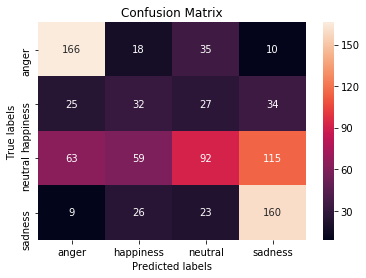


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.72      0.67       229
  happiness       0.24      0.27      0.25       118
    neutral       0.52      0.28      0.36       329
    sadness       0.50      0.73      0.60       218

avg / total       0.51      0.50      0.49       894
 

Train Epoch: 13 [0/3598 (0%)]	Loss: 1.180444

Train Epoch: 13 [640/3598 (18%)]	Loss: 1.155915

Train Epoch: 13 [1280/3598 (35%)]	Loss: 1.161269

Train Epoch: 13 [1920/3598 (53%)]	Loss: 1.080760

Train Epoch: 13 [2560/3598 (70%)]	Loss: 1.095089

Train Epoch: 13 [3200/3598 (88%)]	Loss: 1.101206


Train set: Average loss: 0.0179


Train Accuracy: 1795/3598 (49%)


Test set: Average loss: 0.0174, Accuracy: 448/894 (50%)



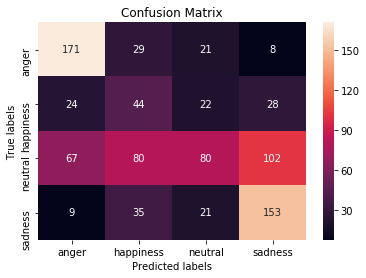


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.75      0.68       229
  happiness       0.23      0.37      0.29       118
    neutral       0.56      0.24      0.34       329
    sadness       0.53      0.70      0.60       218

avg / total       0.53      0.50      0.48       894
 

Train Epoch: 14 [0/3598 (0%)]	Loss: 1.058368

Train Epoch: 14 [640/3598 (18%)]	Loss: 1.114919

Train Epoch: 14 [1280/3598 (35%)]	Loss: 1.187724

Train Epoch: 14 [1920/3598 (53%)]	Loss: 1.024511

Train Epoch: 14 [2560/3598 (70%)]	Loss: 1.166135

Train Epoch: 14 [3200/3598 (88%)]	Loss: 1.119833


Train set: Average loss: 0.0178


Train Accuracy: 1811/3598 (50%)


Test set: Average loss: 0.0173, Accuracy: 451/894 (50%)



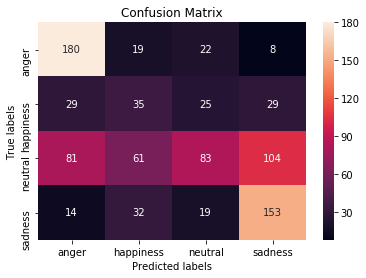


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.79      0.68       229
  happiness       0.24      0.30      0.26       118
    neutral       0.56      0.25      0.35       329
    sadness       0.52      0.70      0.60       218

avg / total       0.51      0.50      0.48       894
 

Train Epoch: 15 [0/3598 (0%)]	Loss: 1.108924

Train Epoch: 15 [640/3598 (18%)]	Loss: 0.994534

Train Epoch: 15 [1280/3598 (35%)]	Loss: 1.179290

Train Epoch: 15 [1920/3598 (53%)]	Loss: 1.105768

Train Epoch: 15 [2560/3598 (70%)]	Loss: 1.118368

Train Epoch: 15 [3200/3598 (88%)]	Loss: 1.200089


Train set: Average loss: 0.0176


Train Accuracy: 1859/3598 (51%)


Test set: Average loss: 0.0174, Accuracy: 440/894 (49%)



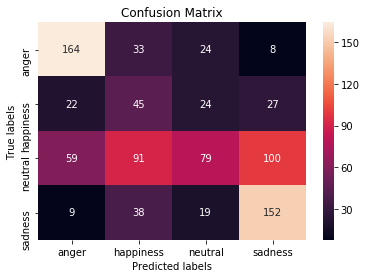


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.72      0.68       229
  happiness       0.22      0.38      0.28       118
    neutral       0.54      0.24      0.33       329
    sadness       0.53      0.70      0.60       218

avg / total       0.52      0.49      0.48       894
 

Train Epoch: 16 [0/3598 (0%)]	Loss: 1.021281

Train Epoch: 16 [640/3598 (18%)]	Loss: 1.172669

Train Epoch: 16 [1280/3598 (35%)]	Loss: 1.074486

Train Epoch: 16 [1920/3598 (53%)]	Loss: 1.098840

Train Epoch: 16 [2560/3598 (70%)]	Loss: 1.056500

Train Epoch: 16 [3200/3598 (88%)]	Loss: 1.071611


Train set: Average loss: 0.0175


Train Accuracy: 1833/3598 (50%)


Test set: Average loss: 0.0173, Accuracy: 439/894 (49%)



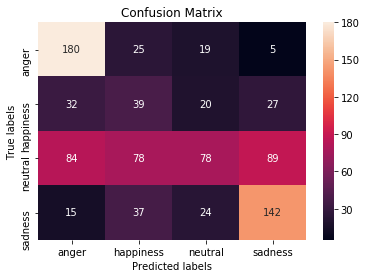


 Classification Report 
              precision    recall  f1-score   support

      anger       0.58      0.79      0.67       229
  happiness       0.22      0.33      0.26       118
    neutral       0.55      0.24      0.33       329
    sadness       0.54      0.65      0.59       218

avg / total       0.51      0.49      0.47       894
 

Train Epoch: 17 [0/3598 (0%)]	Loss: 1.091826

Train Epoch: 17 [640/3598 (18%)]	Loss: 1.199561

Train Epoch: 17 [1280/3598 (35%)]	Loss: 1.059872

Train Epoch: 17 [1920/3598 (53%)]	Loss: 1.096356

Train Epoch: 17 [2560/3598 (70%)]	Loss: 1.058586

Train Epoch: 17 [3200/3598 (88%)]	Loss: 1.109743


Train set: Average loss: 0.0175


Train Accuracy: 1835/3598 (51%)


Test set: Average loss: 0.0171, Accuracy: 456/894 (51%)



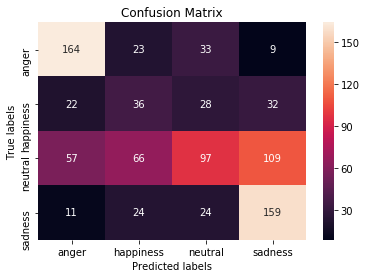


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.72      0.68       229
  happiness       0.24      0.31      0.27       118
    neutral       0.53      0.29      0.38       329
    sadness       0.51      0.73      0.60       218

avg / total       0.52      0.51      0.50       894
 

Train Epoch: 18 [0/3598 (0%)]	Loss: 0.964497

Train Epoch: 18 [640/3598 (18%)]	Loss: 1.105225

Train Epoch: 18 [1280/3598 (35%)]	Loss: 1.167098

Train Epoch: 18 [1920/3598 (53%)]	Loss: 1.053274

Train Epoch: 18 [2560/3598 (70%)]	Loss: 1.083153

Train Epoch: 18 [3200/3598 (88%)]	Loss: 1.091944


Train set: Average loss: 0.0173


Train Accuracy: 1852/3598 (51%)


Test set: Average loss: 0.0168, Accuracy: 478/894 (53%)



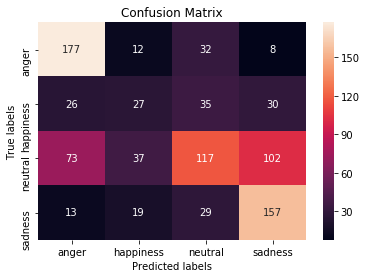


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.77      0.68       229
  happiness       0.28      0.23      0.25       118
    neutral       0.55      0.36      0.43       329
    sadness       0.53      0.72      0.61       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 19 [0/3598 (0%)]	Loss: 1.053546

Train Epoch: 19 [640/3598 (18%)]	Loss: 1.084368

Train Epoch: 19 [1280/3598 (35%)]	Loss: 1.062297

Train Epoch: 19 [1920/3598 (53%)]	Loss: 1.215465

Train Epoch: 19 [2560/3598 (70%)]	Loss: 0.954368

Train Epoch: 19 [3200/3598 (88%)]	Loss: 1.058310


Train set: Average loss: 0.0172


Train Accuracy: 1885/3598 (52%)


Test set: Average loss: 0.0169, Accuracy: 478/894 (53%)



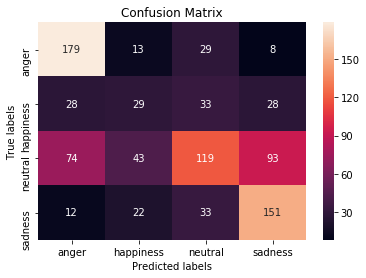


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.78      0.69       229
  happiness       0.27      0.25      0.26       118
    neutral       0.56      0.36      0.44       329
    sadness       0.54      0.69      0.61       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 20 [0/3598 (0%)]	Loss: 1.025889

Train Epoch: 20 [640/3598 (18%)]	Loss: 1.015521

Train Epoch: 20 [1280/3598 (35%)]	Loss: 1.120672

Train Epoch: 20 [1920/3598 (53%)]	Loss: 0.987158

Train Epoch: 20 [2560/3598 (70%)]	Loss: 1.148763

Train Epoch: 20 [3200/3598 (88%)]	Loss: 1.025787


Train set: Average loss: 0.0173


Train Accuracy: 1912/3598 (53%)


Test set: Average loss: 0.0171, Accuracy: 451/894 (50%)



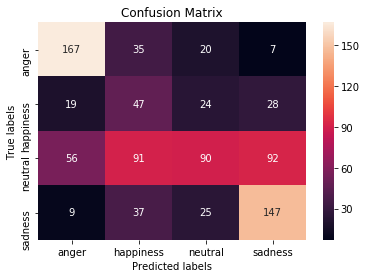


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.73      0.70       229
  happiness       0.22      0.40      0.29       118
    neutral       0.57      0.27      0.37       329
    sadness       0.54      0.67      0.60       218

avg / total       0.54      0.50      0.50       894
 

Train Epoch: 21 [0/3598 (0%)]	Loss: 1.187093

Train Epoch: 21 [640/3598 (18%)]	Loss: 1.036702

Train Epoch: 21 [1280/3598 (35%)]	Loss: 0.913479

Train Epoch: 21 [1920/3598 (53%)]	Loss: 1.127707

Train Epoch: 21 [2560/3598 (70%)]	Loss: 1.058624

Train Epoch: 21 [3200/3598 (88%)]	Loss: 1.029788


Train set: Average loss: 0.0172


Train Accuracy: 1896/3598 (52%)


Test set: Average loss: 0.0170, Accuracy: 469/894 (52%)



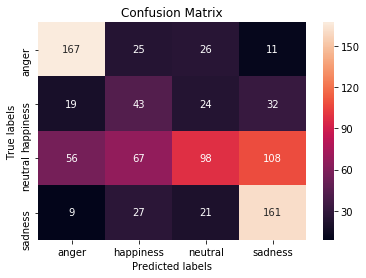


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.73      0.70       229
  happiness       0.27      0.36      0.31       118
    neutral       0.58      0.30      0.39       329
    sadness       0.52      0.74      0.61       218

avg / total       0.54      0.52      0.51       894
 

Train Epoch: 22 [0/3598 (0%)]	Loss: 1.046976

Train Epoch: 22 [640/3598 (18%)]	Loss: 1.089694

Train Epoch: 22 [1280/3598 (35%)]	Loss: 1.139654

Train Epoch: 22 [1920/3598 (53%)]	Loss: 1.081497

Train Epoch: 22 [2560/3598 (70%)]	Loss: 0.961798

Train Epoch: 22 [3200/3598 (88%)]	Loss: 1.030518


Train set: Average loss: 0.0171


Train Accuracy: 1912/3598 (53%)


Test set: Average loss: 0.0168, Accuracy: 480/894 (53%)



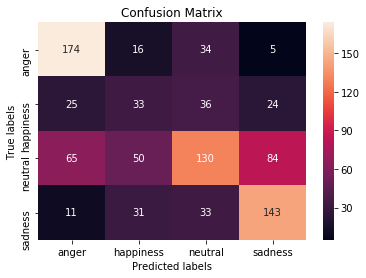


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.76      0.69       229
  happiness       0.25      0.28      0.27       118
    neutral       0.56      0.40      0.46       329
    sadness       0.56      0.66      0.60       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 23 [0/3598 (0%)]	Loss: 1.176683

Train Epoch: 23 [640/3598 (18%)]	Loss: 1.074540

Train Epoch: 23 [1280/3598 (35%)]	Loss: 1.054987

Train Epoch: 23 [1920/3598 (53%)]	Loss: 1.073898

Train Epoch: 23 [2560/3598 (70%)]	Loss: 1.057166

Train Epoch: 23 [3200/3598 (88%)]	Loss: 1.145503


Train set: Average loss: 0.0170


Train Accuracy: 1915/3598 (53%)


Test set: Average loss: 0.0168, Accuracy: 482/894 (53%)



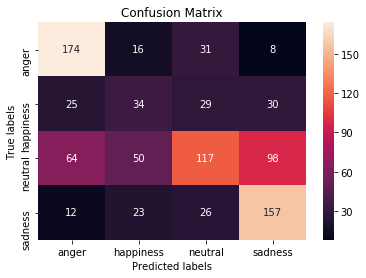


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.76      0.69       229
  happiness       0.28      0.29      0.28       118
    neutral       0.58      0.36      0.44       329
    sadness       0.54      0.72      0.61       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 24 [0/3598 (0%)]	Loss: 1.058680

Train Epoch: 24 [640/3598 (18%)]	Loss: 0.961793

Train Epoch: 24 [1280/3598 (35%)]	Loss: 1.092815

Train Epoch: 24 [1920/3598 (53%)]	Loss: 1.027021

Train Epoch: 24 [2560/3598 (70%)]	Loss: 1.209954

Train Epoch: 24 [3200/3598 (88%)]	Loss: 1.013544


Train set: Average loss: 0.0169


Train Accuracy: 1952/3598 (54%)


Test set: Average loss: 0.0167, Accuracy: 483/894 (54%)



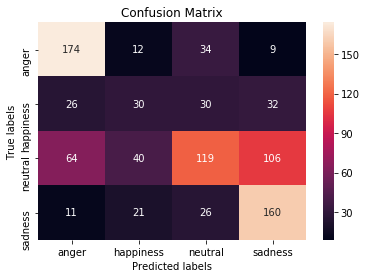


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.76      0.69       229
  happiness       0.29      0.25      0.27       118
    neutral       0.57      0.36      0.44       329
    sadness       0.52      0.73      0.61       218

avg / total       0.54      0.54      0.52       894
 

Train Epoch: 25 [0/3598 (0%)]	Loss: 1.035951

Train Epoch: 25 [640/3598 (18%)]	Loss: 1.015043

Train Epoch: 25 [1280/3598 (35%)]	Loss: 0.993853

Train Epoch: 25 [1920/3598 (53%)]	Loss: 1.130342

Train Epoch: 25 [2560/3598 (70%)]	Loss: 1.030695

Train Epoch: 25 [3200/3598 (88%)]	Loss: 1.149230


Train set: Average loss: 0.0170


Train Accuracy: 1928/3598 (53%)


Test set: Average loss: 0.0167, Accuracy: 471/894 (52%)



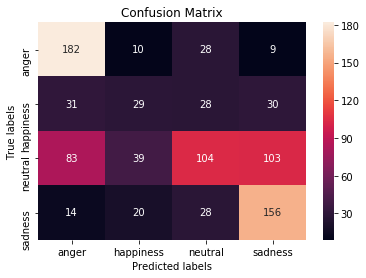


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.79      0.68       229
  happiness       0.30      0.25      0.27       118
    neutral       0.55      0.32      0.40       329
    sadness       0.52      0.72      0.60       218

avg / total       0.52      0.53      0.50       894
 

Train Epoch: 26 [0/3598 (0%)]	Loss: 1.138101

Train Epoch: 26 [640/3598 (18%)]	Loss: 0.985669

Train Epoch: 26 [1280/3598 (35%)]	Loss: 1.037000

Train Epoch: 26 [1920/3598 (53%)]	Loss: 1.101422

Train Epoch: 26 [2560/3598 (70%)]	Loss: 1.027125

Train Epoch: 26 [3200/3598 (88%)]	Loss: 1.087210


Train set: Average loss: 0.0170


Train Accuracy: 1961/3598 (54%)


Test set: Average loss: 0.0169, Accuracy: 459/894 (51%)



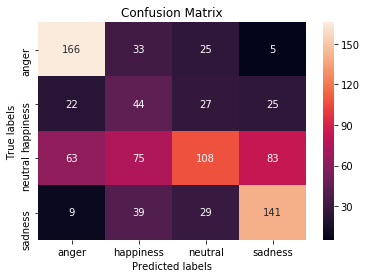


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.72      0.68       229
  happiness       0.23      0.37      0.28       118
    neutral       0.57      0.33      0.42       329
    sadness       0.56      0.65      0.60       218

avg / total       0.54      0.51      0.51       894
 

Train Epoch: 27 [0/3598 (0%)]	Loss: 1.053166

Train Epoch: 27 [640/3598 (18%)]	Loss: 1.140511

Train Epoch: 27 [1280/3598 (35%)]	Loss: 1.133311

Train Epoch: 27 [1920/3598 (53%)]	Loss: 1.000968

Train Epoch: 27 [2560/3598 (70%)]	Loss: 1.092741

Train Epoch: 27 [3200/3598 (88%)]	Loss: 1.005179


Train set: Average loss: 0.0168


Train Accuracy: 1971/3598 (54%)


Test set: Average loss: 0.0167, Accuracy: 482/894 (53%)



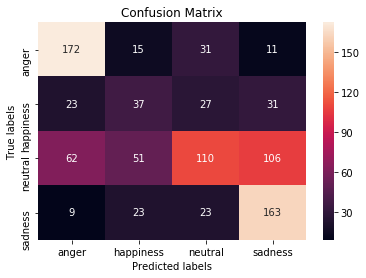


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.75      0.69       229
  happiness       0.29      0.31      0.30       118
    neutral       0.58      0.33      0.42       329
    sadness       0.52      0.75      0.62       218

avg / total       0.54      0.54      0.52       894
 

Train Epoch: 28 [0/3598 (0%)]	Loss: 1.134070

Train Epoch: 28 [640/3598 (18%)]	Loss: 1.073148

Train Epoch: 28 [1280/3598 (35%)]	Loss: 1.261002

Train Epoch: 28 [1920/3598 (53%)]	Loss: 0.974385

Train Epoch: 28 [2560/3598 (70%)]	Loss: 0.883103

Train Epoch: 28 [3200/3598 (88%)]	Loss: 1.042141


Train set: Average loss: 0.0168


Train Accuracy: 1963/3598 (54%)


Test set: Average loss: 0.0170, Accuracy: 449/894 (50%)



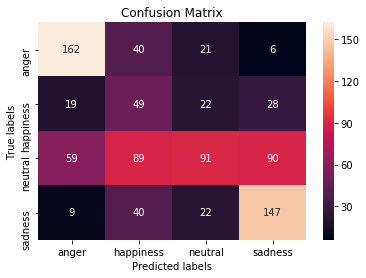


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.71      0.68       229
  happiness       0.22      0.42      0.29       118
    neutral       0.58      0.28      0.38       329
    sadness       0.54      0.67      0.60       218

avg / total       0.54      0.50      0.50       894
 

Train Epoch: 29 [0/3598 (0%)]	Loss: 1.149540

Train Epoch: 29 [640/3598 (18%)]	Loss: 0.962600

Train Epoch: 29 [1280/3598 (35%)]	Loss: 0.978592

Train Epoch: 29 [1920/3598 (53%)]	Loss: 1.045351

Train Epoch: 29 [2560/3598 (70%)]	Loss: 1.030906

Train Epoch: 29 [3200/3598 (88%)]	Loss: 1.011225


Train set: Average loss: 0.0168


Train Accuracy: 1928/3598 (53%)


Test set: Average loss: 0.0167, Accuracy: 470/894 (52%)



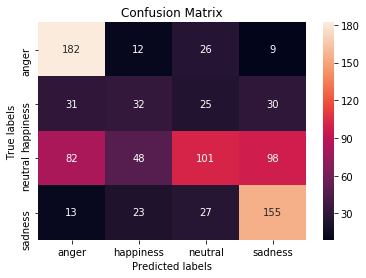


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.79      0.68       229
  happiness       0.28      0.27      0.27       118
    neutral       0.56      0.31      0.40       329
    sadness       0.53      0.71      0.61       218

avg / total       0.53      0.53      0.50       894
 

Train Epoch: 30 [0/3598 (0%)]	Loss: 0.999479

Train Epoch: 30 [640/3598 (18%)]	Loss: 1.120173

Train Epoch: 30 [1280/3598 (35%)]	Loss: 0.965642

Train Epoch: 30 [1920/3598 (53%)]	Loss: 1.085898

Train Epoch: 30 [2560/3598 (70%)]	Loss: 1.071791

Train Epoch: 30 [3200/3598 (88%)]	Loss: 1.000529


Train set: Average loss: 0.0167


Train Accuracy: 1952/3598 (54%)


Test set: Average loss: 0.0166, Accuracy: 478/894 (53%)



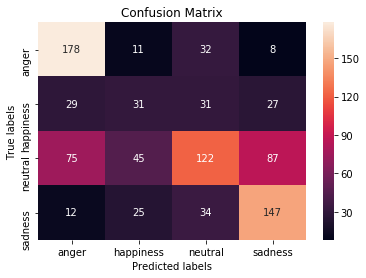


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.78      0.68       229
  happiness       0.28      0.26      0.27       118
    neutral       0.56      0.37      0.45       329
    sadness       0.55      0.67      0.60       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 31 [0/3598 (0%)]	Loss: 1.041346

Train Epoch: 31 [640/3598 (18%)]	Loss: 1.033238

Train Epoch: 31 [1280/3598 (35%)]	Loss: 0.921407

Train Epoch: 31 [1920/3598 (53%)]	Loss: 1.015453

Train Epoch: 31 [2560/3598 (70%)]	Loss: 1.040827

Train Epoch: 31 [3200/3598 (88%)]	Loss: 1.012501


Train set: Average loss: 0.0166


Train Accuracy: 2001/3598 (55%)


Test set: Average loss: 0.0165, Accuracy: 488/894 (54%)



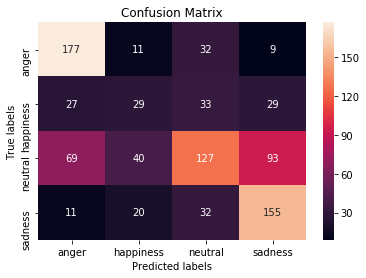


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.77      0.69       229
  happiness       0.29      0.25      0.27       118
    neutral       0.57      0.39      0.46       329
    sadness       0.54      0.71      0.62       218

avg / total       0.54      0.55      0.53       894
 

Train Epoch: 32 [0/3598 (0%)]	Loss: 0.986370

Train Epoch: 32 [640/3598 (18%)]	Loss: 0.989073

Train Epoch: 32 [1280/3598 (35%)]	Loss: 0.991375

Train Epoch: 32 [1920/3598 (53%)]	Loss: 1.122367

Train Epoch: 32 [2560/3598 (70%)]	Loss: 1.053852

Train Epoch: 32 [3200/3598 (88%)]	Loss: 1.135270


Train set: Average loss: 0.0165


Train Accuracy: 1967/3598 (54%)


Test set: Average loss: 0.0165, Accuracy: 483/894 (54%)



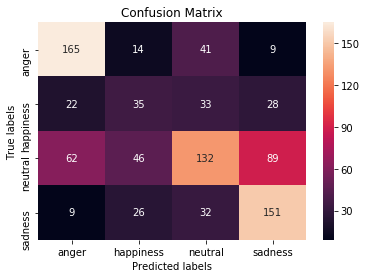


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.72      0.68       229
  happiness       0.29      0.30      0.29       118
    neutral       0.55      0.40      0.47       329
    sadness       0.55      0.69      0.61       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 33 [0/3598 (0%)]	Loss: 1.170107

Train Epoch: 33 [640/3598 (18%)]	Loss: 0.917578

Train Epoch: 33 [1280/3598 (35%)]	Loss: 1.198493

Train Epoch: 33 [1920/3598 (53%)]	Loss: 1.122002

Train Epoch: 33 [2560/3598 (70%)]	Loss: 1.052279

Train Epoch: 33 [3200/3598 (88%)]	Loss: 1.038874


Train set: Average loss: 0.0165


Train Accuracy: 2004/3598 (55%)


Test set: Average loss: 0.0167, Accuracy: 471/894 (52%)



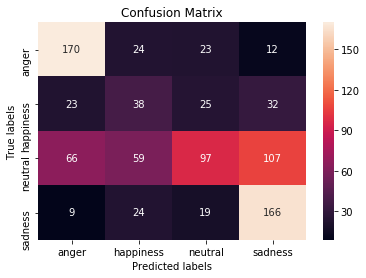


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.74      0.68       229
  happiness       0.26      0.32      0.29       118
    neutral       0.59      0.29      0.39       329
    sadness       0.52      0.76      0.62       218

avg / total       0.54      0.53      0.51       894
 

Train Epoch: 34 [0/3598 (0%)]	Loss: 0.986591

Train Epoch: 34 [640/3598 (18%)]	Loss: 0.946821

Train Epoch: 34 [1280/3598 (35%)]	Loss: 1.076638

Train Epoch: 34 [1920/3598 (53%)]	Loss: 1.085998

Train Epoch: 34 [2560/3598 (70%)]	Loss: 0.976244

Train Epoch: 34 [3200/3598 (88%)]	Loss: 1.170199


Train set: Average loss: 0.0166


Train Accuracy: 1974/3598 (54%)


Test set: Average loss: 0.0167, Accuracy: 469/894 (52%)



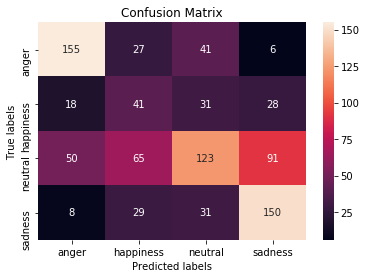


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.68      0.67       229
  happiness       0.25      0.35      0.29       118
    neutral       0.54      0.37      0.44       329
    sadness       0.55      0.69      0.61       218

avg / total       0.54      0.52      0.52       894
 

Train Epoch: 35 [0/3598 (0%)]	Loss: 1.069734

Train Epoch: 35 [640/3598 (18%)]	Loss: 1.083668

Train Epoch: 35 [1280/3598 (35%)]	Loss: 1.152650

Train Epoch: 35 [1920/3598 (53%)]	Loss: 0.962025

Train Epoch: 35 [2560/3598 (70%)]	Loss: 1.006222

Train Epoch: 35 [3200/3598 (88%)]	Loss: 1.023076


Train set: Average loss: 0.0165


Train Accuracy: 2009/3598 (55%)


Test set: Average loss: 0.0168, Accuracy: 459/894 (51%)



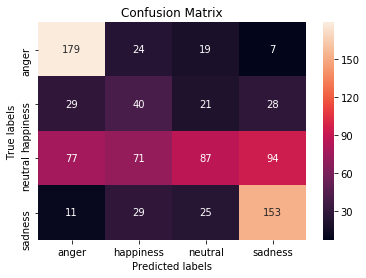


 Classification Report 
              precision    recall  f1-score   support

      anger       0.60      0.78      0.68       229
  happiness       0.24      0.34      0.28       118
    neutral       0.57      0.26      0.36       329
    sadness       0.54      0.70      0.61       218

avg / total       0.53      0.51      0.49       894
 

Train Epoch: 36 [0/3598 (0%)]	Loss: 1.055110

Train Epoch: 36 [640/3598 (18%)]	Loss: 0.936618

Train Epoch: 36 [1280/3598 (35%)]	Loss: 0.951207

Train Epoch: 36 [1920/3598 (53%)]	Loss: 1.046217

Train Epoch: 36 [2560/3598 (70%)]	Loss: 0.844951

Train Epoch: 36 [3200/3598 (88%)]	Loss: 1.038581


Train set: Average loss: 0.0164


Train Accuracy: 1981/3598 (55%)


Test set: Average loss: 0.0165, Accuracy: 473/894 (52%)



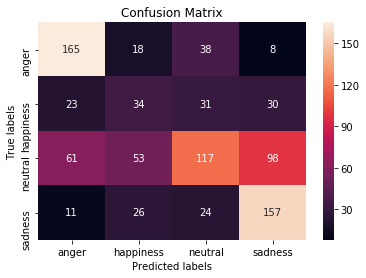


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.72      0.67       229
  happiness       0.26      0.29      0.27       118
    neutral       0.56      0.36      0.43       329
    sadness       0.54      0.72      0.61       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 37 [0/3598 (0%)]	Loss: 1.036248

Train Epoch: 37 [640/3598 (18%)]	Loss: 1.065412

Train Epoch: 37 [1280/3598 (35%)]	Loss: 0.986333

Train Epoch: 37 [1920/3598 (53%)]	Loss: 1.042665

Train Epoch: 37 [2560/3598 (70%)]	Loss: 1.029962

Train Epoch: 37 [3200/3598 (88%)]	Loss: 0.983543


Train set: Average loss: 0.0163


Train Accuracy: 1999/3598 (55%)


Test set: Average loss: 0.0166, Accuracy: 462/894 (51%)



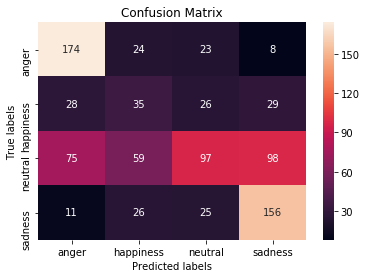


 Classification Report 
              precision    recall  f1-score   support

      anger       0.60      0.76      0.67       229
  happiness       0.24      0.30      0.27       118
    neutral       0.57      0.29      0.39       329
    sadness       0.54      0.72      0.61       218

avg / total       0.53      0.52      0.50       894
 

Train Epoch: 38 [0/3598 (0%)]	Loss: 1.031902

Train Epoch: 38 [640/3598 (18%)]	Loss: 1.076576

Train Epoch: 38 [1280/3598 (35%)]	Loss: 0.959546

Train Epoch: 38 [1920/3598 (53%)]	Loss: 1.033113

Train Epoch: 38 [2560/3598 (70%)]	Loss: 0.934764

Train Epoch: 38 [3200/3598 (88%)]	Loss: 1.026667


Train set: Average loss: 0.0163


Train Accuracy: 2009/3598 (55%)


Test set: Average loss: 0.0166, Accuracy: 471/894 (52%)



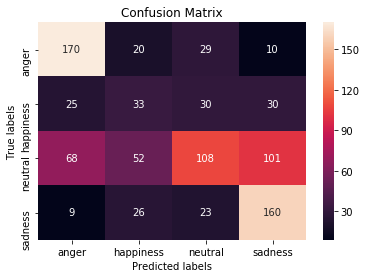


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.74      0.68       229
  happiness       0.25      0.28      0.27       118
    neutral       0.57      0.33      0.42       329
    sadness       0.53      0.73      0.62       218

avg / total       0.53      0.53      0.51       894
 

Train Epoch: 39 [0/3598 (0%)]	Loss: 1.010534

Train Epoch: 39 [640/3598 (18%)]	Loss: 1.004666

Train Epoch: 39 [1280/3598 (35%)]	Loss: 1.062176

Train Epoch: 39 [1920/3598 (53%)]	Loss: 1.006974

Train Epoch: 39 [2560/3598 (70%)]	Loss: 1.135892

Train Epoch: 39 [3200/3598 (88%)]	Loss: 0.959244


Train set: Average loss: 0.0163


Train Accuracy: 2042/3598 (56%)


Test set: Average loss: 0.0166, Accuracy: 468/894 (52%)



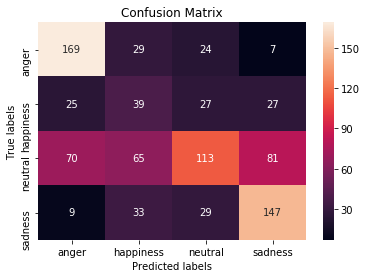


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.74      0.67       229
  happiness       0.23      0.33      0.27       118
    neutral       0.59      0.34      0.43       329
    sadness       0.56      0.67      0.61       218

avg / total       0.54      0.52      0.52       894
 

Train Epoch: 40 [0/3598 (0%)]	Loss: 1.085245

Train Epoch: 40 [640/3598 (18%)]	Loss: 1.086265

Train Epoch: 40 [1280/3598 (35%)]	Loss: 0.959317

Train Epoch: 40 [1920/3598 (53%)]	Loss: 1.081246

Train Epoch: 40 [2560/3598 (70%)]	Loss: 1.066806

Train Epoch: 40 [3200/3598 (88%)]	Loss: 0.830295


Train set: Average loss: 0.0163


Train Accuracy: 1993/3598 (55%)


Test set: Average loss: 0.0166, Accuracy: 471/894 (52%)



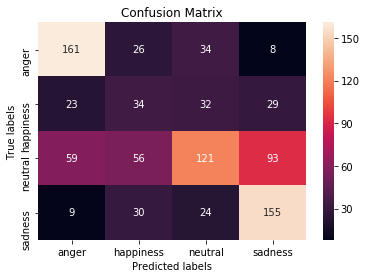


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.70      0.67       229
  happiness       0.23      0.29      0.26       118
    neutral       0.57      0.37      0.45       329
    sadness       0.54      0.71      0.62       218

avg / total       0.54      0.53      0.52       894
 



In [31]:
history = []
n_epoch = 41
for epoch in range(1, n_epoch):
#     exp_lr_scheduler.step(epoch)
    
    train_loss, train_acc = train(epoch, model)
    
    test_loss, test_acc = test(model)
    
#     plateau_scheduler.step(test_loss)
    
    history.append([train_loss, train_acc, test_loss, test_acc])

In [32]:
history_df = pd.DataFrame(history, columns=["train_loss", "train_acc", "test_loss", "test_acc"])

In [33]:
history_df["epoch"] = [x for x in range(1, n_epoch)]

In [34]:
history_df

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.021700,30,0.020424,42,1
1,0.020704,39,0.019975,40,2
2,0.019978,41,0.019231,46,3
3,0.019635,44,0.018700,48,4
4,0.019189,47,0.018448,47,5
5,0.019029,45,0.018345,47,6
6,0.018708,47,0.017965,49,7
7,0.018301,48,0.017837,48,8
8,0.018318,48,0.017627,51,9
9,0.018038,49,0.017490,50,10


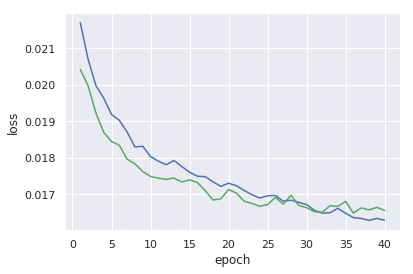

In [35]:
sns.set()
sns.lineplot(x='epoch', y='train_loss', data=history_df, color='b')
# plt.xticks(history_df.epoch)
sns.lineplot(x='epoch', y='test_loss', data=history_df, color='g')
plt.ylabel("loss")
plt.show()

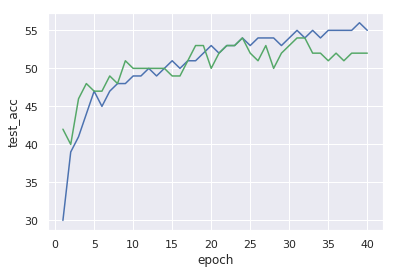

In [36]:
sns.set()
sns.lineplot(x='epoch', y='train_acc', data=history_df, color='b')
# plt.xticks(history_df.epoch)
sns.lineplot(x='epoch', y='test_acc', data=history_df, color='g')
plt.show()

In [37]:
torch.save(model, model_save_path + '/ResNet34_Freeze_SGD_Weights.pth')

In [38]:
model = torch.load(model_save_path + '/ResNet34_Freeze_SGD_Weights.pth')

In [39]:
ct = 0
for child in model.children():
    ct += 1
    if ct > 7:
        print("child", ct, "was not frozen")
        for param in child.parameters():
            param.requires_grad = True
    else:
        print("child", ct, "was frozen")

child 1 was frozen
child 2 was frozen
child 3 was frozen
child 4 was frozen
child 5 was frozen
child 6 was frozen
child 7 was frozen
child 8 was not frozen
child 9 was not frozen
child 10 was not frozen


In [187]:
# for param in model.parameters():
#     param.requires_grad = True

In [46]:
# optimizer = optim.Adam(model.parameters(), lr=0.003)
# exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [40]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

21,388,076 total parameters.
13,217,772 training parameters.


In [41]:
model = model.to(device)

Train Epoch: 1 [0/3598 (0%)]	Loss: 1.203329

Train Epoch: 1 [640/3598 (18%)]	Loss: 1.081115

Train Epoch: 1 [1280/3598 (35%)]	Loss: 0.936910

Train Epoch: 1 [1920/3598 (53%)]	Loss: 0.994605

Train Epoch: 1 [2560/3598 (70%)]	Loss: 1.127862

Train Epoch: 1 [3200/3598 (88%)]	Loss: 1.023035


Train set: Average loss: 0.0161


Train Accuracy: 2064/3598 (57%)


Test set: Average loss: 0.0165, Accuracy: 477/894 (53%)



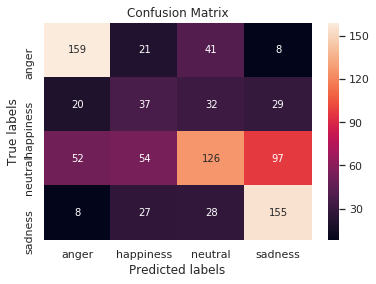


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.69      0.68       229
  happiness       0.27      0.31      0.29       118
    neutral       0.56      0.38      0.45       329
    sadness       0.54      0.71      0.61       218

avg / total       0.54      0.53      0.53       894
 

Train Epoch: 2 [0/3598 (0%)]	Loss: 1.093819

Train Epoch: 2 [640/3598 (18%)]	Loss: 1.020945

Train Epoch: 2 [1280/3598 (35%)]	Loss: 1.214462

Train Epoch: 2 [1920/3598 (53%)]	Loss: 0.957161

Train Epoch: 2 [2560/3598 (70%)]	Loss: 0.985796

Train Epoch: 2 [3200/3598 (88%)]	Loss: 1.088386


Train set: Average loss: 0.0162


Train Accuracy: 2059/3598 (57%)


Test set: Average loss: 0.0165, Accuracy: 473/894 (52%)



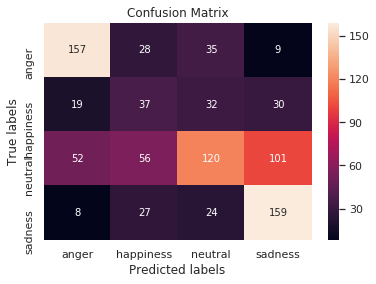


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.69      0.68       229
  happiness       0.25      0.31      0.28       118
    neutral       0.57      0.36      0.44       329
    sadness       0.53      0.73      0.62       218

avg / total       0.54      0.53      0.52       894
 

Train Epoch: 3 [0/3598 (0%)]	Loss: 0.910175

Train Epoch: 3 [640/3598 (18%)]	Loss: 1.078971

Train Epoch: 3 [1280/3598 (35%)]	Loss: 0.854100

Train Epoch: 3 [1920/3598 (53%)]	Loss: 1.136201

Train Epoch: 3 [2560/3598 (70%)]	Loss: 1.036794

Train Epoch: 3 [3200/3598 (88%)]	Loss: 1.048977


Train set: Average loss: 0.0161


Train Accuracy: 2011/3598 (55%)


Test set: Average loss: 0.0165, Accuracy: 473/894 (52%)



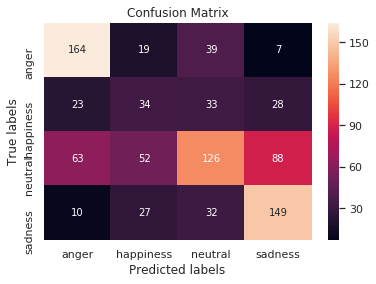


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.72      0.67       229
  happiness       0.26      0.29      0.27       118
    neutral       0.55      0.38      0.45       329
    sadness       0.55      0.68      0.61       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 4 [0/3598 (0%)]	Loss: 1.062010

Train Epoch: 4 [640/3598 (18%)]	Loss: 1.140687

Train Epoch: 4 [1280/3598 (35%)]	Loss: 0.981320

Train Epoch: 4 [1920/3598 (53%)]	Loss: 0.983985

Train Epoch: 4 [2560/3598 (70%)]	Loss: 0.974581

Train Epoch: 4 [3200/3598 (88%)]	Loss: 1.070657


Train set: Average loss: 0.0162


Train Accuracy: 2085/3598 (57%)


Test set: Average loss: 0.0165, Accuracy: 476/894 (53%)



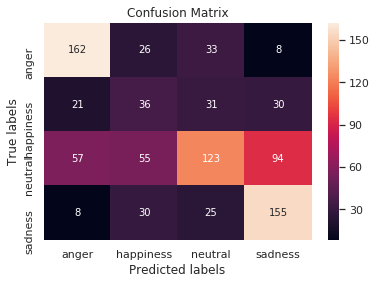


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.71      0.68       229
  happiness       0.24      0.31      0.27       118
    neutral       0.58      0.37      0.45       329
    sadness       0.54      0.71      0.61       218

avg / total       0.54      0.53      0.53       894
 

Train Epoch: 5 [0/3598 (0%)]	Loss: 0.952189

Train Epoch: 5 [640/3598 (18%)]	Loss: 0.978415

Train Epoch: 5 [1280/3598 (35%)]	Loss: 1.062633

Train Epoch: 5 [1920/3598 (53%)]	Loss: 1.021671

Train Epoch: 5 [2560/3598 (70%)]	Loss: 1.016895

Train Epoch: 5 [3200/3598 (88%)]	Loss: 1.117125


Train set: Average loss: 0.0161


Train Accuracy: 2045/3598 (56%)


Test set: Average loss: 0.0165, Accuracy: 474/894 (53%)



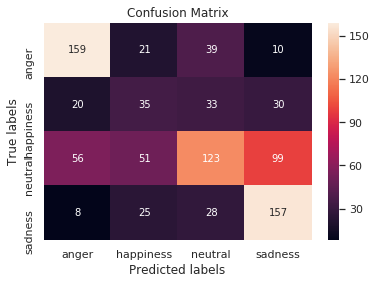


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.69      0.67       229
  happiness       0.27      0.30      0.28       118
    neutral       0.55      0.37      0.45       329
    sadness       0.53      0.72      0.61       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 6 [0/3598 (0%)]	Loss: 1.001980

Train Epoch: 6 [640/3598 (18%)]	Loss: 0.996217

Train Epoch: 6 [1280/3598 (35%)]	Loss: 0.964471

Train Epoch: 6 [1920/3598 (53%)]	Loss: 1.084092

Train Epoch: 6 [2560/3598 (70%)]	Loss: 0.977804

Train Epoch: 6 [3200/3598 (88%)]	Loss: 1.040905


Train set: Average loss: 0.0162


Train Accuracy: 2050/3598 (56%)


Test set: Average loss: 0.0165, Accuracy: 473/894 (52%)



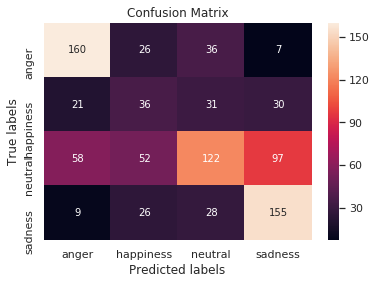


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.70      0.67       229
  happiness       0.26      0.31      0.28       118
    neutral       0.56      0.37      0.45       329
    sadness       0.54      0.71      0.61       218

avg / total       0.54      0.53      0.52       894
 

Train Epoch: 7 [0/3598 (0%)]	Loss: 1.084541

Train Epoch: 7 [640/3598 (18%)]	Loss: 0.908288

Train Epoch: 7 [1280/3598 (35%)]	Loss: 1.117254

Train Epoch: 7 [1920/3598 (53%)]	Loss: 1.017301

Train Epoch: 7 [2560/3598 (70%)]	Loss: 1.307479

Train Epoch: 7 [3200/3598 (88%)]	Loss: 0.912508


Train set: Average loss: 0.0163


Train Accuracy: 2048/3598 (56%)


Test set: Average loss: 0.0165, Accuracy: 473/894 (52%)



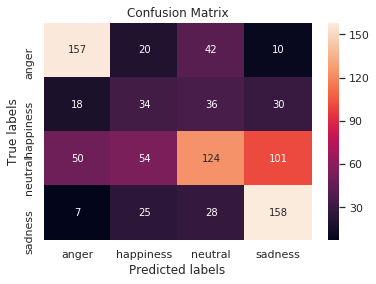


 Classification Report 
              precision    recall  f1-score   support

      anger       0.68      0.69      0.68       229
  happiness       0.26      0.29      0.27       118
    neutral       0.54      0.38      0.44       329
    sadness       0.53      0.72      0.61       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 8 [0/3598 (0%)]	Loss: 1.057813

Train Epoch: 8 [640/3598 (18%)]	Loss: 0.996746

Train Epoch: 8 [1280/3598 (35%)]	Loss: 1.042073

Train Epoch: 8 [1920/3598 (53%)]	Loss: 1.049249

Train Epoch: 8 [2560/3598 (70%)]	Loss: 1.086804

Train Epoch: 8 [3200/3598 (88%)]	Loss: 1.095841


Train set: Average loss: 0.0162


Train Accuracy: 2035/3598 (56%)


Test set: Average loss: 0.0165, Accuracy: 477/894 (53%)



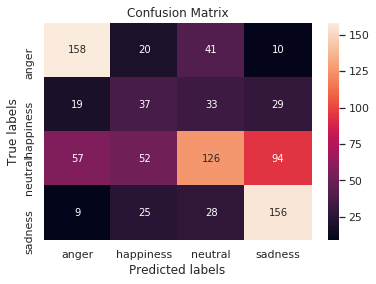


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.69      0.67       229
  happiness       0.28      0.31      0.29       118
    neutral       0.55      0.38      0.45       329
    sadness       0.54      0.72      0.62       218

avg / total       0.54      0.53      0.53       894
 

Train Epoch: 9 [0/3598 (0%)]	Loss: 0.994445

Train Epoch: 9 [640/3598 (18%)]	Loss: 1.079515

Train Epoch: 9 [1280/3598 (35%)]	Loss: 1.012779

Train Epoch: 9 [1920/3598 (53%)]	Loss: 0.976933

Train Epoch: 9 [2560/3598 (70%)]	Loss: 1.052051

Train Epoch: 9 [3200/3598 (88%)]	Loss: 1.036835


Train set: Average loss: 0.0163


Train Accuracy: 2041/3598 (56%)


Test set: Average loss: 0.0165, Accuracy: 473/894 (52%)



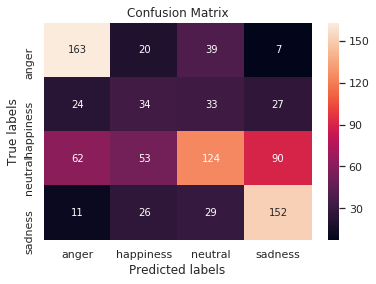


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.71      0.67       229
  happiness       0.26      0.29      0.27       118
    neutral       0.55      0.38      0.45       329
    sadness       0.55      0.70      0.62       218

avg / total       0.53      0.53      0.52       894
 

Train Epoch: 10 [0/3598 (0%)]	Loss: 1.047483

Train Epoch: 10 [640/3598 (18%)]	Loss: 1.155312

Train Epoch: 10 [1280/3598 (35%)]	Loss: 1.091958

Train Epoch: 10 [1920/3598 (53%)]	Loss: 1.019120

Train Epoch: 10 [2560/3598 (70%)]	Loss: 0.973192

Train Epoch: 10 [3200/3598 (88%)]	Loss: 0.989918


Train set: Average loss: 0.0161


Train Accuracy: 2046/3598 (56%)


Test set: Average loss: 0.0165, Accuracy: 468/894 (52%)



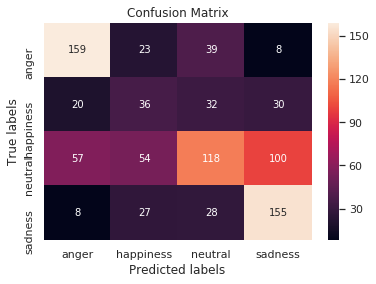


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.69      0.67       229
  happiness       0.26      0.31      0.28       118
    neutral       0.54      0.36      0.43       329
    sadness       0.53      0.71      0.61       218

avg / total       0.53      0.52      0.52       894
 



In [42]:
history_unfreeze = []
n_epoch_unfrz = 11
for epoch in range(1, n_epoch_unfrz):
#     exp_lr_scheduler.step(epoch)
    
    train_loss, train_acc = train(epoch, model)
    
    test_loss, test_acc = test(model)
    
    history_unfreeze.append([train_loss, train_acc, test_loss, test_acc])

In [43]:
history_df_unfrz = pd.DataFrame(history_unfreeze, columns=["train_loss", "train_acc", "test_loss", "test_acc"])

In [44]:
history_df_unfrz["epoch"] = [x for x in range(n_epoch, n_epoch + n_epoch_unfrz - 1)]

In [45]:
history_df_unfrz

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.016093,57,0.016507,53,41
1,0.016200,57,0.016548,52,42
2,0.016137,55,0.016485,52,43
3,0.016171,57,0.016512,53,44
4,0.016119,56,0.016484,53,45
5,0.016242,56,0.016498,52,46
6,0.016255,56,0.016479,52,47
7,0.016247,56,0.016493,53,48
8,0.016292,56,0.016522,52,49
9,0.016131,56,0.016505,52,50


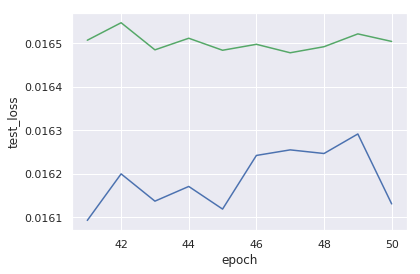

In [46]:
sns.set()
sns.lineplot(x='epoch', y='train_loss', data=history_df_unfrz, color='b')
sns.lineplot(x='epoch', y='test_loss', data=history_df_unfrz, color='g')
plt.show()
# plt.xticks()

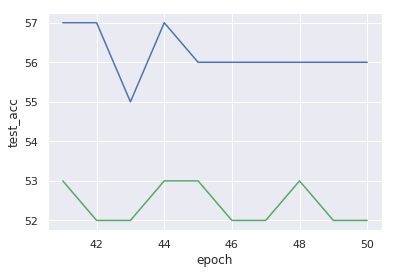

In [47]:
sns.set()
sns.lineplot(x='epoch', y='train_acc', data=history_df_unfrz, color='b')
sns.lineplot(x='epoch', y='test_acc', data=history_df_unfrz, color='g')
plt.show()
# plt.xticks()

In [48]:
torch.save(model, model_save_path + '/ResNet34_UnFreeze_Weights.pth')

In [49]:
history_total = pd.concat([history_df, history_df_unfrz])

In [50]:
history_total

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.021700,30,0.020424,42,1
1,0.020704,39,0.019975,40,2
2,0.019978,41,0.019231,46,3
3,0.019635,44,0.018700,48,4
4,0.019189,47,0.018448,47,5
5,0.019029,45,0.018345,47,6
6,0.018708,47,0.017965,49,7
7,0.018301,48,0.017837,48,8
8,0.018318,48,0.017627,51,9
9,0.018038,49,0.017490,50,10


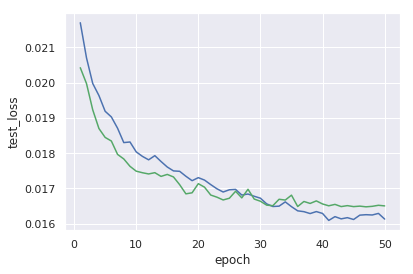

In [51]:
sns.set()
sns.lineplot(x='epoch', y='train_loss', data=history_total, color='b')
sns.lineplot(x='epoch', y='test_loss', data=history_total, color='g')
plt.show()
# plt.xticks()

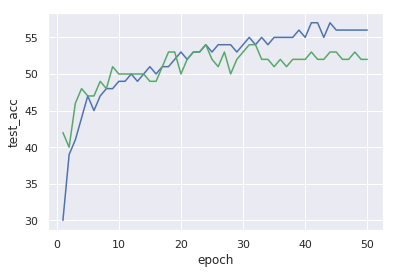

In [52]:
sns.set()
sns.lineplot(x='epoch', y='train_acc', data=history_total, color='b')
sns.lineplot(x='epoch', y='test_acc', data=history_total, color='g')
plt.show()
# plt.xticks()